Importar a biblioteca e a base de dados 


In [0]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

from sklearn.datasets import load_digits 

Carregar os dados 

In [2]:
digits = load_digits()

print(digits.data.shape)
print(digits.data.size) #total number of elements. this is rows x columns 
print(digits.data.ndim)

(1797, 64)
115008
2


Plotar as imagens

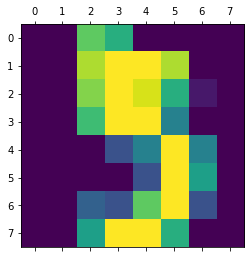

In [3]:
#plt.gray()
plt.matshow(digits.images[5])
plt.show()

Mostrar todos os dados


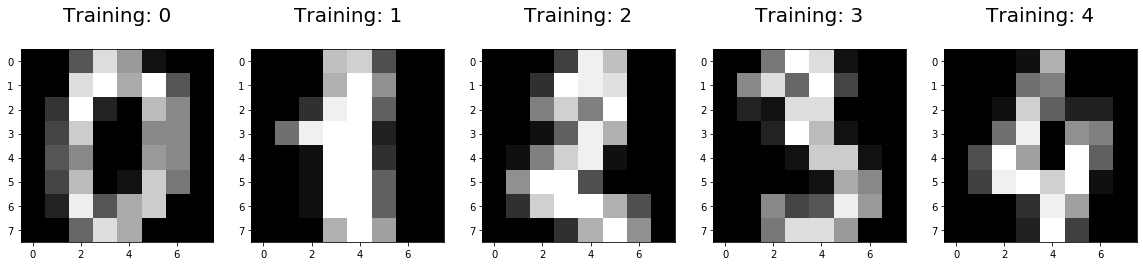

In [4]:
plt.figure(figsize=(20,4))
for index,(image,label) in enumerate(zip(digits.data[0:5],digits.target[0:5])):
  plt.subplot(1,5,index + 1)
  plt.imshow(np.reshape(image,(8,8)),cmap= plt.cm.gray)
  plt.title('Training: %i\n'%label, fontsize = 20)
plt.show()

Cada numero é formato por uma matriz 8x8

In [5]:
print(np.reshape(digits.data[0], (8,8)))

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


Normalizar a base 

In [0]:
entrada = digits.data.astype('float')/255.0
labels = digits.target


In [7]:
print(np.reshape(entrada[0],(8,8)))

[[0.         0.         0.01960784 0.05098039 0.03529412 0.00392157
  0.         0.        ]
 [0.         0.         0.05098039 0.05882353 0.03921569 0.05882353
  0.01960784 0.        ]
 [0.         0.01176471 0.05882353 0.00784314 0.         0.04313725
  0.03137255 0.        ]
 [0.         0.01568627 0.04705882 0.         0.         0.03137255
  0.03137255 0.        ]
 [0.         0.01960784 0.03137255 0.         0.         0.03529412
  0.03137255 0.        ]
 [0.         0.01568627 0.04313725 0.         0.00392157 0.04705882
  0.02745098 0.        ]
 [0.         0.00784314 0.05490196 0.01960784 0.03921569 0.04705882
  0.         0.        ]
 [0.         0.         0.02352941 0.05098039 0.03921569 0.
  0.         0.        ]]


Separar o conjuto de testes e de treinamento 


In [8]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(entrada, labels, test_size=0.3)

print(Xtrain.shape,ytrain.shape)
print(Xtest.shape,ytest.shape)

(1257, 64) (1257,)
(540, 64) (540,)


one hot coding - converter os labels que são representados por números inteiros para o formato de vetor binário

In [0]:
from sklearn.preprocessing import LabelBinarizer 
lb = LabelBinarizer()
ytrain = lb.fit_transform(ytrain)
ytest = lb.transform(ytest)

Importar o modelo e definir a arquitetura


http://sigmoidal.ai/redes-neurais-python-keras-2/


In [12]:
from keras.models import Sequential 
from keras.layers.core import Dense 
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(128,activation='sigmoid')) #ou relu
model.add(Dense(64,activation='relu'))
#output
model.add(Dense(10,activation='softmax'))


Using TensorFlow backend.


treinamento


In [13]:
print('[INFO] treinando a rede neural........')
model.compile(optimizer=SGD(0.01),loss='categorical_crossentropy',metrics=['accuracy'])

H = model.fit(Xtrain, ytrain, batch_size=128, epochs=10, verbose=2, validation_data=(Xtest,ytest))

[INFO] treinando a rede neural........




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 1257 samples, validate on 540 samples
Epoch 1/10





 - 4s - loss: 2.3810 - acc: 0.1122 - val_loss: 2.3730 - val_acc: 0.0815
Epoch 2/10
 - 0s - loss: 2.3365 - acc: 0.1034 - val_loss: 2.3398 - val_acc: 0.0815
Epoch 3/10
 - 0s - loss: 2.3194 - acc: 0.1050 - val_loss: 2.3248 - val_acc: 0.0778
Epoch 4/10
 - 0s - loss: 2.3113 - acc: 0.1082 - val_loss: 2.3165 - val_acc: 0.0778
Epoch 5/10
 - 0s - loss: 2.3072 - acc: 0.1082 - val_loss: 2.3126 - val_acc: 0.0778
Epoch 6/10
 - 0s - loss: 2.3055 - acc: 0.1082 - val_loss: 2.3115 - val_acc: 0.0778
Epoch 7/10
 - 0s - loss: 2.3051 - acc: 0.1082 - val_loss: 2.3104 - val_acc: 0.0778
Epoch 8/10
 - 0s - loss: 2.3043 - acc: 0.1082 - val_loss: 2.3099 - val_acc: 0.0778
Epoch 9/10
 - 0s - loss: 2.3040 - acc: 0.1066 - val_loss: 2.3097 - val_acc: 0.0778
Epoch 10/10
 - 0s - loss: 2.3034 - acc: 0.1082 - val_loss: 2.

In [14]:
from sklearn.metrics import classification_report

print('[INFO] avaliando a rede neural...')
predictions = model.predict(Xtest,batch_size=128)
print(classification_report(ytest.argmax(axis=1),predictions.argmax(axis=1)))

[INFO] avaliando a rede neural...
              precision    recall  f1-score   support

           0       0.08      1.00      0.14        42
           1       0.00      0.00      0.00        53
           2       0.00      0.00      0.00        52
           3       0.00      0.00      0.00        55
           4       0.00      0.00      0.00        58
           5       0.00      0.00      0.00        65
           6       0.00      0.00      0.00        61
           7       0.00      0.00      0.00        61
           8       0.00      0.00      0.00        44
           9       0.00      0.00      0.00        49

    accuracy                           0.08       540
   macro avg       0.01      0.10      0.01       540
weighted avg       0.01      0.08      0.01       540



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
